In [ ]:
!git clone https://github.com/ShreyJ1729/MNIST-ASL-Data.git # clone data

Cloning into 'MNIST-ASL-Data'...
remote: Enumerating objects: 18, done.
remote: Counting objects: 100% (18/18), done.
remote: Compressing objects: 100% (15/15), done.
remote: Total 18 (delta 1), reused 5 (delta 0), pack-reused 0
Unpacking objects: 100% (18/18), done.


In [ ]:
# Move data into main directory
!mv MNIST-ASL-Data/* . 

In [ ]:
import pandas as pd
import numpy as np
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Activation, Dropout, Flatten, Dense

In [ ]:
# define dataframes --> numpy arrays for train/testing
df = pd.read_csv("sign_mnist_train.csv")
y_train = df['label'].to_numpy()
y_train = to_categorical(y_train)
x_train = df.drop('label', axis=1).to_numpy()/255
x_train = x_train.reshape(-1, 28, 28, 1)

In [ ]:
df = pd.read_csv("sign_mnist_test.csv")
y_test = df['label'].to_numpy()
y_test = to_categorical(y_test)
x_test = df.drop('label', axis=1).to_numpy()/255
x_test = x_test.reshape(-1, 28, 28, 1)

In [ ]:
# drop out rate
# create the model, think carefully about input shapes, the order of layers, where to add dropout and the units in the final Dense layer
model = Sequential()

model.add(Conv2D(filters=32, kernel_size=(3, 3), input_shape=(28, 28, 1), activation='relu', padding='same'))
model.add(MaxPool2D(pool_size=(2, 2), strides=2))
model.add(Dropout(0.1))

model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu', padding='same'))
model.add(MaxPool2D(pool_size=(2, 2), strides=2))
model.add(Dropout(0.3))

model.add(Conv2D(filters=128, kernel_size=(3, 3), activation='relu', padding='same'))
model.add(MaxPool2D(pool_size=(2, 2), strides=2))
model.add(Dropout(0.5))

model.add(Flatten())

model.add(Dense(64, activation='relu'))

model.add(Dense(25))
model.add(Activation('softmax'))

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_15 (Conv2D)           (None, 28, 28, 32)        320       
_________________________________________________________________
max_pooling2d_15 (MaxPooling (None, 14, 14, 32)        0         
_________________________________________________________________
dropout_15 (Dropout)         (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_16 (Conv2D)           (None, 14, 14, 64)        18496     
_________________________________________________________________
max_pooling2d_16 (MaxPooling (None, 7, 7, 64)          0         
_________________________________________________________________
dropout_16 (Dropout)         (None, 7, 7, 64)          0         
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 7, 7, 128)        

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping
early_stopper = EarlyStopping(monitor='val_loss', patience=3)

In [ ]:
results = model.fit(x_train, y_train, batch_size=32, epochs=50, callbacks=[early_stopper], validation_split=0.2)

Epoch 1/2
258/258 [==============================] - 3s 11ms/step - loss: 3.1359 - accuracy: 0.0702 - val_loss: 2.6204 - val_accuracy: 0.1887
Epoch 2/2
258/258 [==============================] - 3s 10ms/step - loss: 1.6455 - accuracy: 0.4805 - val_loss: 0.7645 - val_accuracy: 0.7756


In [ ]:
model.evaluate(x_test, y_test)

225/225 [==============================] - 1s 3ms/step - loss: 0.8862 - accuracy: 0.7310


[0.8861902952194214, 0.7310373783111572]

Text(0.5, 1.0, 'Accuracy')

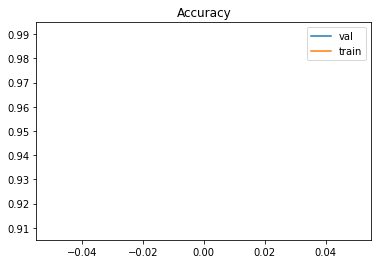

In [ ]:
plt.plot(results.history['val_accuracy'], label="val")
plt.plot(results.history['accuracy'], label="train")
plt.legend()
plt.title("Accuracy")

Text(0.5, 1.0, 'Loss')

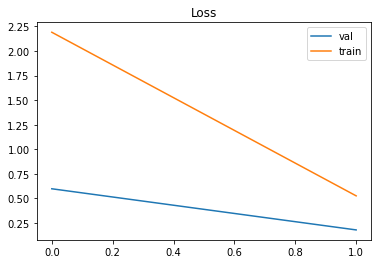

In [ ]:
plt.plot(results.history['val_loss'], label="val")
plt.plot(results.history['loss'], label="train")
plt.legend()
plt.title("Loss")

In [ ]:
predictions = model.predict(x_test)
predictions = np.where(predictions>0.5, 1, 0)
count = 0
incorrect = []
for i in range(len(predictions)):
  if (predictions[i] == y_test[i]).all():
    count += 1
  else:
    incorrect.append(i)
print("Total correct: ", count, " of ", len(predictions))
print("Proportion Correct: ", count/len(predictions))
print("Incorrect: ", incorrect)

Total correct:  6172  of  7172
Proportion Correct:  0.860568878973787
Incorrect:  [13, 29, 36, 38, 46, 48, 52, 58, 60, 65, 66, 86, 87, 93, 110, 115, 118, 119, 123, 143, 151, 177, 189, 194, 201, 203, 207, 208, 213, 224, 228, 245, 261, 263, 267, 270, 280, 286, 289, 294, 296, 313, 321, 334, 336, 357, 359, 361, 362, 363, 384, 392, 399, 404, 405, 411, 413, 425, 431, 436, 442, 444, 445, 453, 454, 455, 456, 459, 463, 469, 471, 475, 488, 489, 491, 501, 504, 505, 513, 524, 528, 529, 546, 547, 554, 565, 566, 570, 576, 583, 585, 595, 622, 628, 629, 647, 649, 651, 662, 683, 684, 686, 687, 713, 715, 726, 727, 729, 739, 742, 746, 750, 751, 753, 756, 762, 768, 771, 779, 780, 798, 805, 814, 821, 824, 827, 837, 843, 849, 868, 877, 910, 911, 913, 920, 942, 953, 969, 983, 985, 990, 999, 1013, 1014, 1021, 1024, 1028, 1032, 1033, 1037, 1038, 1040, 1041, 1043, 1049, 1053, 1067, 1068, 1090, 1092, 1096, 1129, 1135, 1143, 1146, 1147, 1150, 1153, 1155, 1168, 1178, 1187, 1194, 1205, 1209, 1214, 1221, 1238, 1242,

(1, 28, 28, 1)
image class:  B
prediction:  B
Raw input:  [[[[0.41960784]
   [0.43529412]
   [0.44705882]
   [0.45882353]
   [0.4745098 ]
   [0.49019608]
   [0.50196078]
   [0.50588235]
   [0.50980392]
   [0.51372549]
   [0.51764706]
   [0.5254902 ]
   [0.5254902 ]
   [0.5254902 ]
   [0.52156863]
   [0.51764706]
   [0.50980392]
   [0.50588235]
   [0.5254902 ]
   [0.50588235]
   [0.49803922]
   [0.49411765]
   [0.49411765]
   [0.47843137]
   [0.4745098 ]
   [0.4745098 ]
   [0.46666667]
   [0.45490196]]

  [[0.43137255]
   [0.45098039]
   [0.4627451 ]
   [0.47058824]
   [0.48627451]
   [0.50196078]
   [0.50980392]
   [0.51764706]
   [0.5254902 ]
   [0.52941176]
   [0.52941176]
   [0.52941176]
   [0.52941176]
   [0.52941176]
   [0.52156863]
   [0.5254902 ]
   [0.55294118]
   [0.53333333]
   [0.44705882]
   [0.51764706]
   [0.50588235]
   [0.50196078]
   [0.50588235]
   [0.49019608]
   [0.48235294]
   [0.4745098 ]
   [0.47058824]
   [0.4627451 ]]

  [[0.44313725]
   [0.4627451 ]
   [0.4784

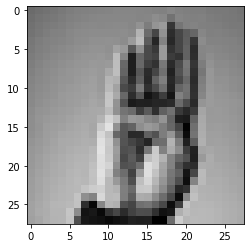

In [ ]:
# Consruct image from array
from PIL import Image
n = np.random.randint(7173, size=1)
image_array = x_test[n].flatten() * 255
print(x_test[n].shape)
image_class = np.argmax(y_test[n])
image_array = np.array([(i, i, i) for i in image_array])
image_array = image_array.reshape(28, 28, 3)

# Use PIL to create an image from the new array of pixels

new_image = Image.fromarray(np.array(image_array, dtype=np.uint8))
new_image.save('new.png')
plt.imshow(new_image)
print("image class: ", chr(image_class+97).upper())
image_prediction = np.argmax(model.predict(x_test[n].flatten().reshape(1, 28, 28, 1)))
print("prediction: ", chr(image_prediction+97).upper())
# print("Raw input: ", x_test[n].flatten().reshape(1, 28, 28, 1))
# print("Raw prediction: ", model.predict(x_test[n].flatten().reshape(1, 28, 28, 1)))

In [ ]:
# Just testing something to make sure im not stupid
np.unique([np.argmax(y_test[i]) for i in range(len(y_test))])

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24])

In [ ]:
model.save("ASLMODEL.h5")

In [ ]:
predictions = model.predict(x_test)
print(predictions)
print(y_test)

[[2.6479343e-06 5.7413301e-05 5.1802061e-02 ... 3.4900028e-03
  5.2420809e-03 7.7107549e-04]
 [5.0211081e-04 1.9312666e-01 4.9437251e-04 ... 2.0603945e-02
  2.3694015e-03 2.4146491e-03]
 [2.8115593e-07 1.0104851e-03 5.5696222e-07 ... 7.3084785e-03
  2.2596333e-03 2.4722021e-03]
 ...
 [9.4489437e-08 7.3593355e-08 9.8005635e-01 ... 4.2463373e-07
  5.0004483e-06 1.0836052e-08]
 [2.3176942e-02 1.4750402e-02 3.9175376e-03 ... 1.8733958e-04
  4.1220546e-06 4.4322155e-06]
 [6.6035305e-08 1.0768376e-08 9.7190171e-01 ... 1.3958412e-07
  4.1373323e-06 4.8294102e-09]]
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 1. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]]


In [ ]:
from sklearn.metrics import confusion_matrix
alphabet=['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y']
matrix = confusion_matrix(y_test.argmax(axis=1), predictions.argmax(axis=1), normalize='true')
# matrix

array([[0.79154079, 0.        , 0.        , 0.        , 0.02719033,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.05438066, 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.12688822, 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.92592593, 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.03703704,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.03703704,
        0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.9483871 , 0.        , 0.        ,
        0.        , 0.        , 0.0516129 , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        ],
       [0.   

In [ ]:

def print_confusion_matrix(confusion_matrix, class_names, figsize = (10,7), fontsize=14):
    """Prints a confusion matrix, as returned by sklearn.metrics.confusion_matrix, as a heatmap.
    
    Arguments
    ---------
    confusion_matrix: numpy.ndarray
        The numpy.ndarray object returned from a call to sklearn.metrics.confusion_matrix. 
        Similarly constructed ndarrays can also be used.
    class_names: list
        An ordered list of class names, in the order they index the given confusion matrix.
    figsize: tuple
        A 2-long tuple, the first value determining the horizontal size of the ouputted figure,
        the second determining the vertical size. Defaults to (10,7).
    fontsize: int
        Font size for axes labels. Defaults to 14.
        
    Returns
    -------
    matplotlib.figure.Figure
        The resulting confusion matrix figure
    """
    df_cm = pd.DataFrame(
        confusion_matrix, index=class_names, columns=class_names, 
    )
    fig = plt.figure(figsize=figsize)
    heatmap = sns.heatmap(df_cm, annot=False, cmap=sns.cm.rocket_r)
    heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=fontsize)
    heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=45, ha='right', fontsize=fontsize)
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    return fig

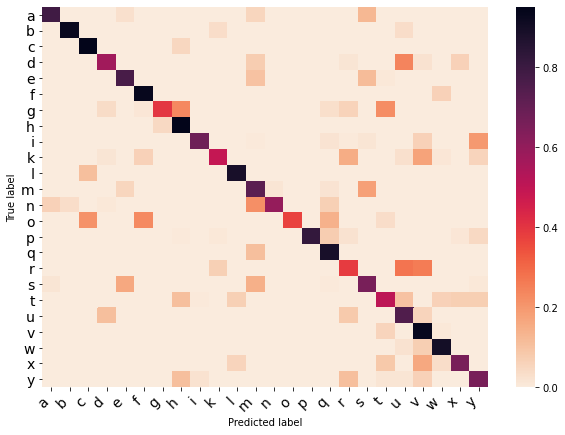

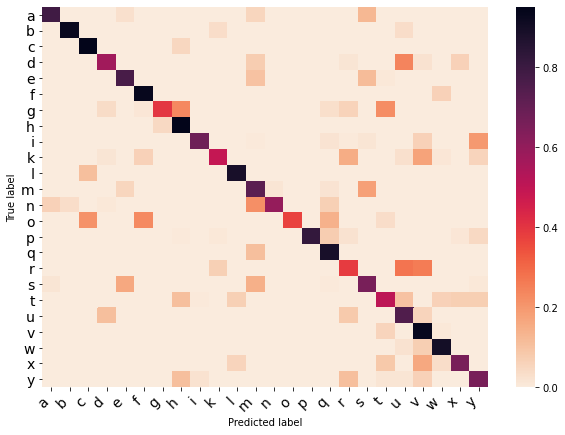

In [ ]:
print_confusion_matrix(matrix, alphabet)

In [ ]:
import tensorflow.lite as lite
converter = lite.TFLiteConverter.from_keras_model(model) # Your model's name
model = converter.convert()
file = open( 'model.tflite' , 'wb' ) 
file.write( model )
# convert to tflite for android studio

675160

In [ ]:
!pip install tensorflowjs

In [ ]:
import tensorflowjs as tfjs

In [ ]:
!tensorflowjs_wizard 
# Convert to tfjs

In [ ]:
from tensorflow.keras.models import load_model
aslModel = load_model("/content/ASL.h5")

In [ ]:
|